# Prevendo Customer Churn de Operadoras Telecom

O objetivo do projeto é conseguir prever se os clientes irão encerrar o relacionamento comercial (Sim ou Não) e a probabilidade de cada opção de ocorrer.

Irei utilizar um modelo de Regressão Logística para extrair as informações necessárias e previsões.

## Etapas a serem executadas:

A - Pré-Processamento

    OK 1. Carregar os Dados;
    OK 2. Tratamento dos Dados;
    OK 3. Realizar análise exploratória das variáveis para entender como os dados estão distribuídos e relacionados;
    OK 4. Feature Selection (Escolha das variáveis mais relevantes para serem utilizadas no modelo);
    OK 5. Padronização das variáveis;
    5.5 Remover os registros que possuem valores outliers, (Regressão Logística tem dificuldade com dados outliers);
    OK 6. Balanceamento dos Dados (Caso exista mais dados de uma classificação que outra);
        
    Obs: Quando os dados de Treino e Teste veem em Dataset separados, a operação deve ser realizada nos dados de Treino
    e também nos dados de Teste.

B - Aprendizado e Avaliação

    OK 1. Split do dataset Treino em Treino/Teste (Para ser possível avaliar a taxa de aprendizagem do modelo);
    OK 2. Escolha do Modelo a ser utilizado;
    OK 3. Cross-Validation;
    OK 4. Confusion Matrix dos dados originais x previstos;
    OK 5. Otimização do modelo (Ajuste de Hiper-parametros);
    
C - Previsão

    OK 1. Tratamento dos Dados (Realizar as operações realizadas no Ds Treino no Ds Teste e remover a Target caso exista);
    OK 2. Previsão de novos dados;
    3. Apresentação Final dos Dados;

### Descrições das Variáveis obtidas no Kaggle

    1."state", string. 2-letter code of the US state of customer residence
    2."account_length", numerical. Number of months the customer has been with the current telco provider
    3."area_code", string="area_code_AAA" where AAA = 3 digit area code.
    4."international_plan", (yes/no). The customer has international plan.
    5."voice_mail_plan", (yes/no). The customer has voice mail plan.
    6."number_vmail_messages", numerical. Number of voice-mail messages.
    7."total_day_minutes", numerical. Total minutes of day calls.
    8."total_day_calls", numerical. Total minutes of day calls.
    9."total_day_charge", numerical. Total charge of day calls.
    10."total_eve_minutes", numerical. Total minutes of evening calls.
    11."total_eve_calls", numerical. Total number of evening calls.
    12."total_eve_charge", numerical. Total charge of evening calls.
    13."total_night_minutes", numerical. Total minutes of night calls.
    14."total_night_calls", numerical. Total number of night calls.
    15."total_night_charge", numerical. Total charge of night calls.
    16."total_intl_minutes", numerical. Total minutes of international calls.
    17."total_intl_calls", numerical. Total number of international calls.
    18."total_intl_charge", numerical. Total charge of international calls
    19."number_customer_service_calls", numerical. Number of calls to customer service
    20."churn", (yes/no). Customer churn - target variable.

### Importação de Bibliotecas e pacotes necessários

In [1]:
# Biblioteca para manipulação de Dados
import pandas as pd

# Biblioteca para plotar os gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Biblioteca para operação matemáticas de matrizes e arrays
import numpy as np

# Biblioteca para filtrar warnings e não apresentar na tela
import warnings
warnings.filterwarnings("ignore")

# Biblioteca utilizada durante as operações de Feature Selection e Treinamento do Modelo
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Biblioteca utilizada durante a padronização dos dados
from sklearn.preprocessing import StandardScaler

# Biblioteca utilizada para realizar o balanceamento dos dados
#!pip install imblearn (instalação do pacote caso não exista)
from imblearn.over_sampling import SMOTE

# Bibilioteca utilizada durante o split dos dados em treino e teste
from sklearn.model_selection import train_test_split

# Biblioteca utilizada para avaliação do modelo criado
from sklearn import metrics

# Biblioteca utilizada para realizar o cross-validation com os dados teste
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Biblioteca utilizada para otimização de hyper-parametros
from sklearn.model_selection import GridSearchCV

### A - Pré-Processamento: 1. Carregar os Dados

In [2]:
# Carregando o dataset de treino utilizando Pandas
ds_train = pd.read_csv("data/projeto4_telecom_treino.csv", sep = ",")

In [3]:
# Visualizando os primeiros 15 registros do Dataset.
ds_train.head(15)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
5,6,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
6,7,MA,121,area_code_510,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
7,8,MO,147,area_code_415,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
8,9,LA,117,area_code_408,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
9,10,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no


In [4]:
# Visualizando as informações do Dataset
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Unnamed: 0                       3333 non-null int64
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes           

Com base nos dados observados na célula acima, é possível notar que algumas variáveis podem ter seu tipo transformado de "object" variáveis numéricas.

### A - Pré-Processamento: 2. Tratamento de dados

In [5]:
# Removendo a Coluna {Unnamed: 0} que está caracterizando a sequência de registros do Dataset.
ds_train = ds_train.drop('Unnamed: 0', axis=1)

In [6]:
# Verificando os valores distintos de cada coluna do dataset
for i in ds_train.columns:
    x = ds_train[i].unique()
    print(x)

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5  

In [7]:
# Função que será utilizada para transforma algumas variáveis string em Numéricas através de um mapeamento de dict.
def transformColumns(dataset):
    
    # Transforma as strings de valores Yes/No em 1/0 e atribui em um nvo campo, exceto a variável target Churn
    dictmapYesNo = {"yes": 1, "no": 0}
    
    dataset['international_plan_num'] = dataset['international_plan'].map(dictmapYesNo)
    dataset['voice_mail_plan_num'] = dataset['voice_mail_plan'].map(dictmapYesNo)    
    dataset['churn'] = dataset['churn'].map(dictmapYesNo)
        
    # Remove as strings dos códigos de Area, preservando somente o código em um novo campo
    dictmapAreaCode = {"area_code_415": 0, "area_code_408": 1, "area_code_510": 2}

    dataset['area_code_num'] = dataset['area_code'].map(dictmapAreaCode)
    
    # Transforma o valor dos status em Numeros em um novo campo
    dictmapState = {'KS': 1000, 'OH': 1001, 'NJ': 1002, 'OK': 1003, 'AL': 1004, 'MA': 1005, 
                    'MO': 1006, 'LA': 1007, 'WV': 1008, 'IN': 1009, 'RI': 1010, 
                    'IA': 1011, 'MT': 1012, 'NY': 1013, 'ID': 1014, 'VT': 1015, 
                    'VA': 1016, 'TX': 1017, 'FL': 1018, 'CO': 1019, 'AZ': 1020, 
                    'SC': 1021, 'NE': 1022, 'WY': 1023, 'HI': 1024, 'IL': 1025, 
                    'NH': 1026, 'GA': 1027, 'AK': 1028, 'MD': 1029, 'AR': 1030, 
                    'WI': 1031, 'OR': 1032, 'MI': 1033, 'DE': 1034, 'UT': 1035, 
                    'CA': 1036, 'MN': 1037, 'SD': 1038, 'NC': 1039, 'WA': 1040, 
                    'NM': 1041, 'NV': 1042, 'DC': 1043, 'KY': 1044, 'ME': 1045, 
                    'MS': 1046, 'TN': 1047, 'PA': 1048, 'CT': 1049, 'ND': 1050
                   }
    
    dataset['state_num'] = dataset['state'].map(dictmapState)
  

    # Transforma as variáveis que eram strings e foram manipuladas em Categóricas
    dataset['international_plan'] = dataset['international_plan'].astype('category')
    dataset['voice_mail_plan']    = dataset['voice_mail_plan'].astype('category')    
    dataset['area_code']          = dataset['area_code'].astype('category')
    dataset['state']              = dataset['state'].astype('category')

    # Reordenando as colunas para que a coluna TARGET (churn) seja a última coluna do Dataframe
    dataset = dataset[[col for col in dataset if col not in ['churn']] + ['churn']]    
    
    return dataset

In [8]:
ds_train = transformColumns(ds_train)

In [9]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
state                            3333 non-null category
account_length                   3333 non-null int64
area_code                        3333 non-null category
international_plan               3333 non-null category
voice_mail_plan                  3333 non-null category
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls   

In [10]:
ds_train.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,...,11.01,10.0,3,2.70,1,0,1,0,1000,0
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,11.45,13.7,3,3.70,1,0,1,0,1001,0
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,7.32,12.2,5,3.29,0,0,0,0,1002,0
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,8.86,6.6,7,1.78,2,1,0,1,1001,0
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,8.41,10.1,3,2.73,3,1,0,0,1003,0
5,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,...,9.18,6.3,6,1.70,0,1,0,2,1004,0
6,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,...,9.57,7.5,7,2.03,3,0,1,2,1005,0
7,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,...,9.53,7.1,6,1.92,0,1,0,0,1006,0
8,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,...,9.71,8.7,4,2.35,1,0,0,1,1007,0
9,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,...,14.69,11.2,5,3.02,0,1,1,0,1008,0


### A - Pré-Processamento: 3. Realizando Análises Exploratórias dos Dados para compreendê-los

In [11]:
ds_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.096910,0.276628,0.755476,1024.269127,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.295879,0.447398,0.830054,14.736558,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000,1012.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,0.000000,1.000000,1024.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,1.000000,2.000000,1037.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000,2.000000,1050.000000,1.000000


In [12]:
# Verificando se existem valores NULL
ds_train.isnull().values.any()

False

In [13]:
# Analisando como está a distribuição dos Dados na variável churn (nossa TARGET). 
# 0 -> Não 1 -> Sim
ds_train.groupby('churn').size()

churn
0    2850
1     483
dtype: int64

In [14]:
Count_No = len(ds_train[ds_train['churn']==0])
Count_Yes = len(ds_train[ds_train['churn']==1])

print ("Percentual de Clientes que Cancelaram: ", round((Count_Yes / (Count_Yes+Count_No))*100,2))
print ("Percentual de Clientes que Não Cancelaram: ", round((Count_No / (Count_Yes+Count_No))*100,2))

Percentual de Clientes que Cancelaram:  14.49
Percentual de Clientes que Não Cancelaram:  85.51


É possível notal que os dados não estão balanceados. Deve-se utilizar técnicas de balanceamento para que o modelo criado não fique têndencioso por aprender mais sobre uma classificação que outra.

### Gerando Histogramas para compreender a distribuição dos Dados

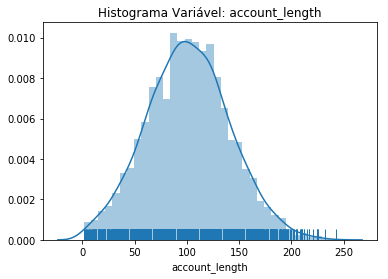

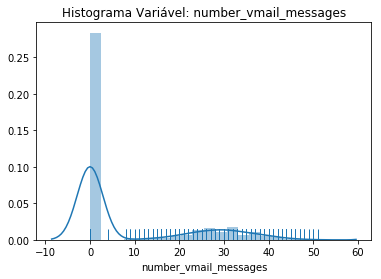

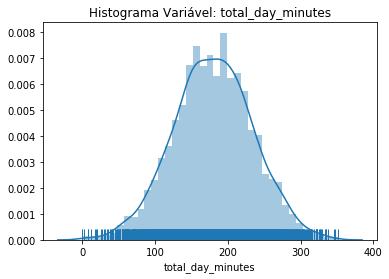

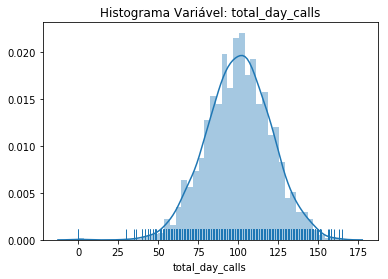

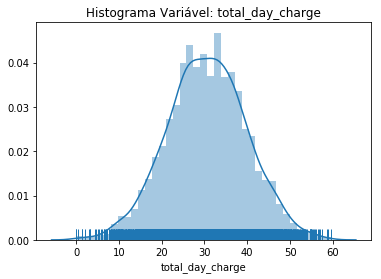

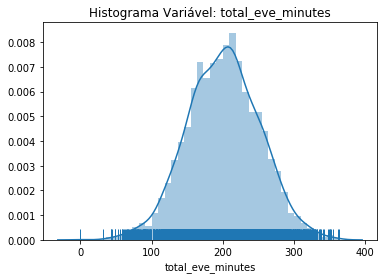

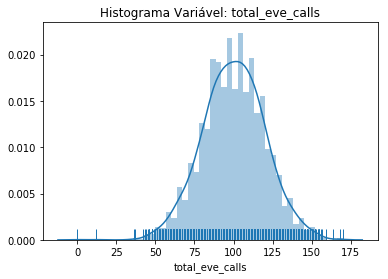

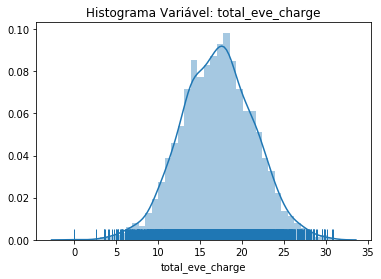

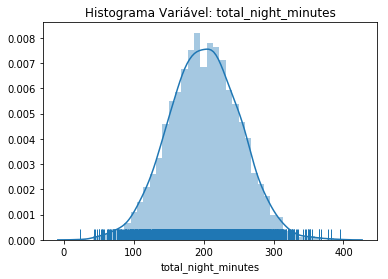

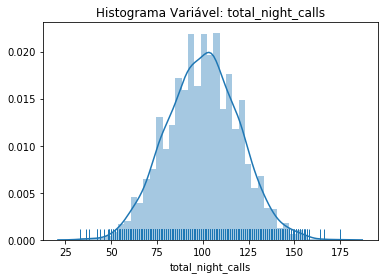

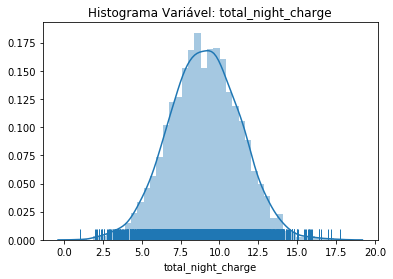

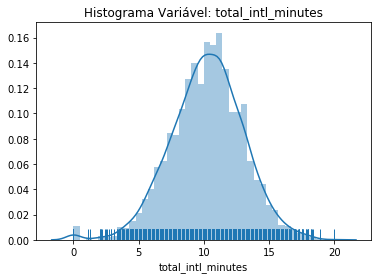

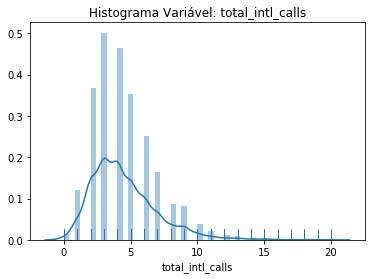

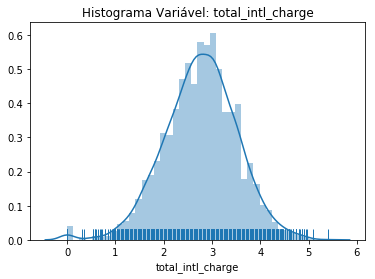

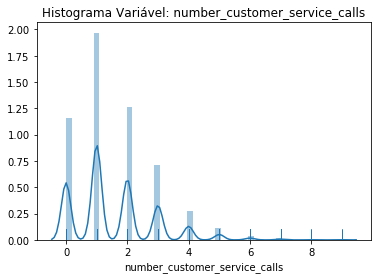

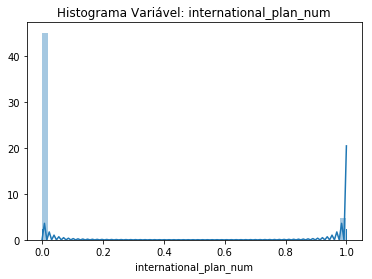

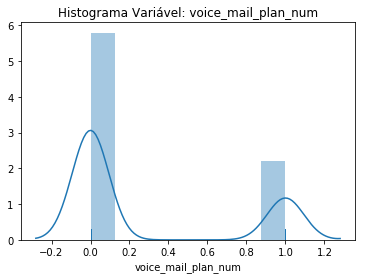

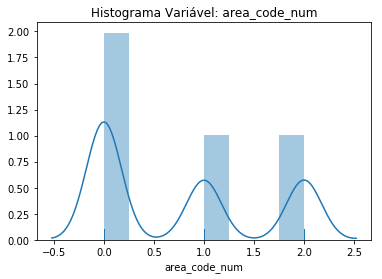

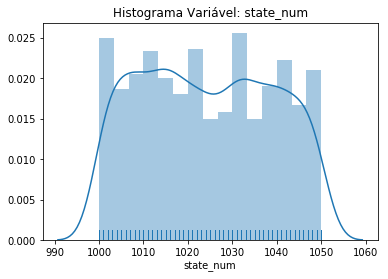

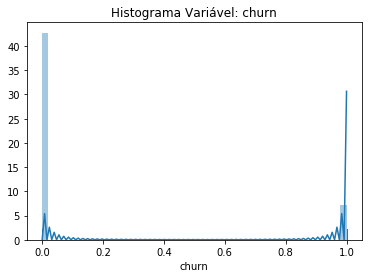

In [15]:
columns = ds_train.select_dtypes(exclude='category').columns

for i in columns:
    #ds_train[i].plot(kind = 'hist')
    sns.distplot(ds_train[i], rug=True)
    plt.title('Histograma Variável: ' + i)
    plt.xlabel(i)    
    plt.show()

### Verificando qual a relação de varíaveis categóricas em relação a variável TARGET (churn)

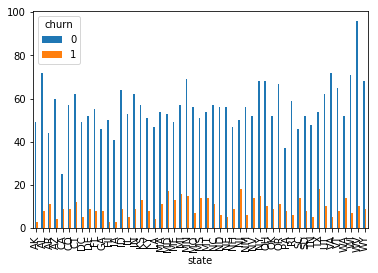

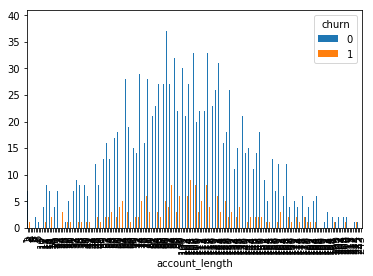

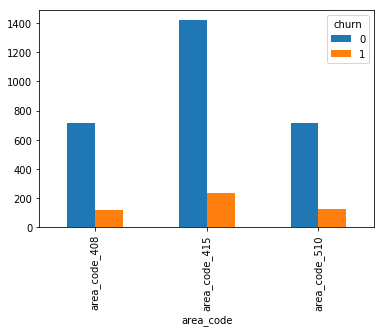

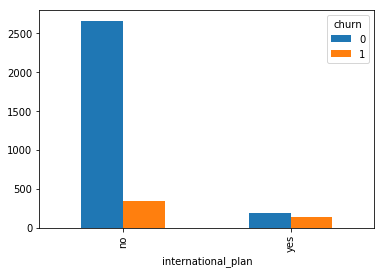

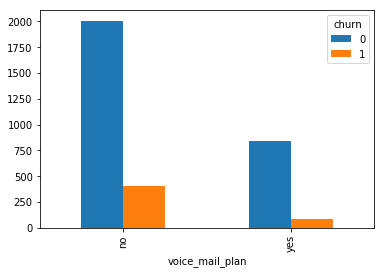

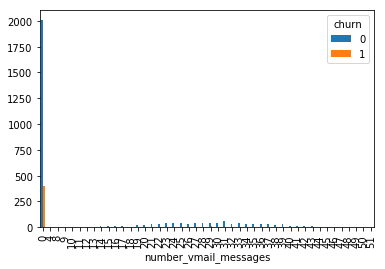

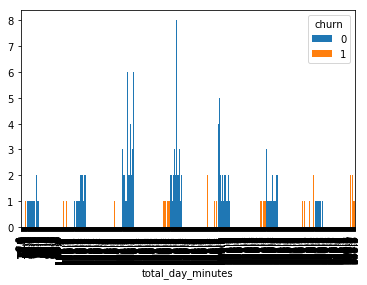

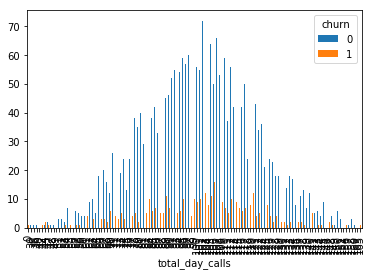

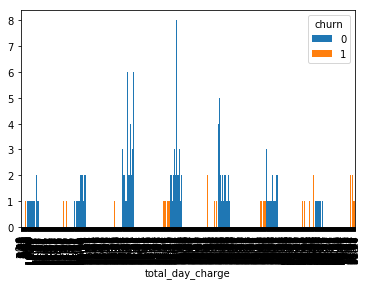

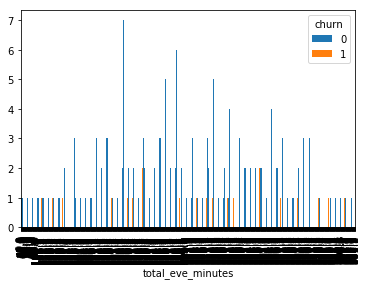

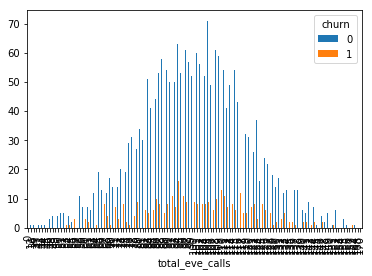

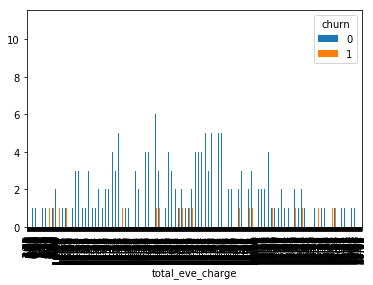

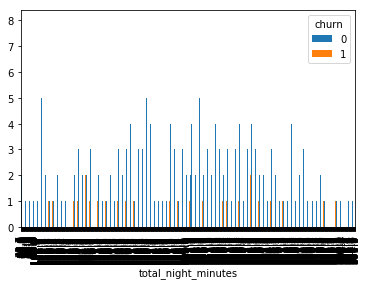

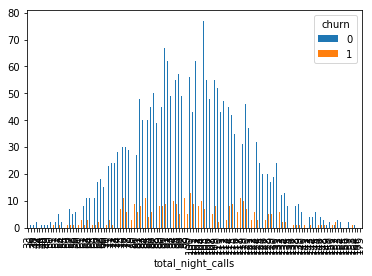

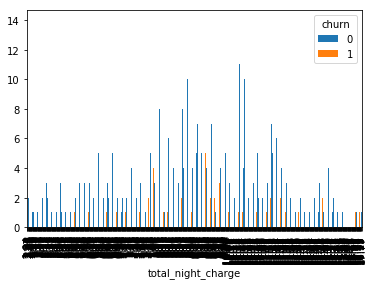

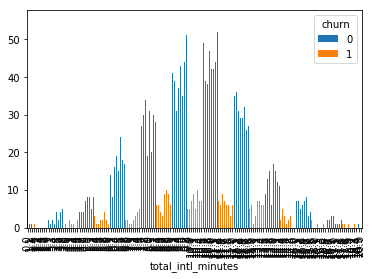

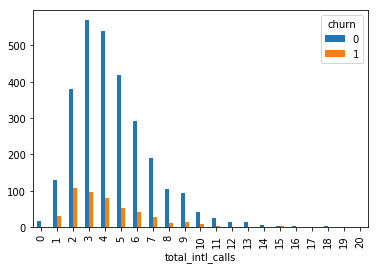

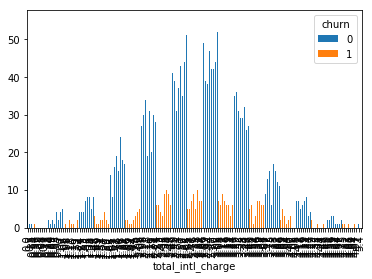

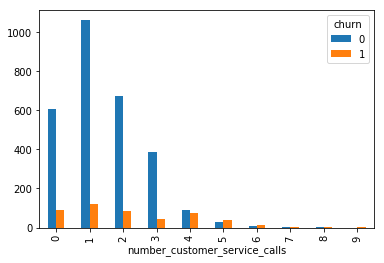

In [16]:
cols = [col for col in ds_train.columns if col not in ['international_plan_num','voice_mail_plan_num','area_code_num','state_num','churn']]
for i in cols:
    pd.crosstab(ds_train[i], ds_train.churn).plot(kind = 'bar')
    plt.show()

### Gerando BoxPlots para compreender a dispersão dos dados

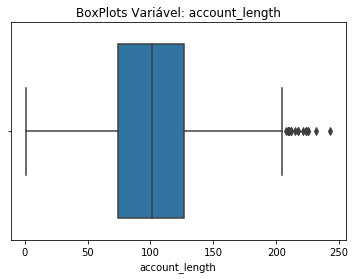

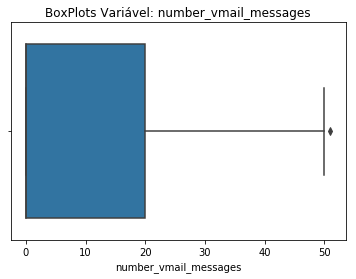

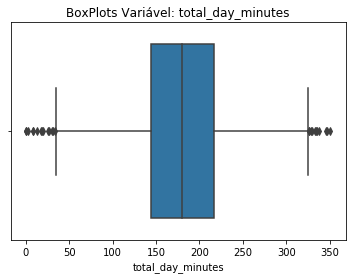

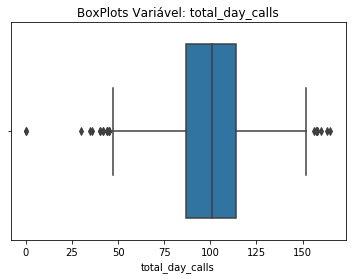

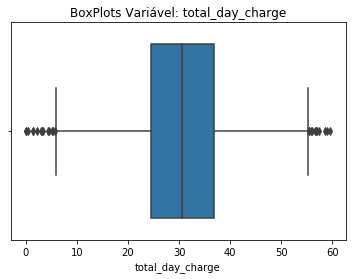

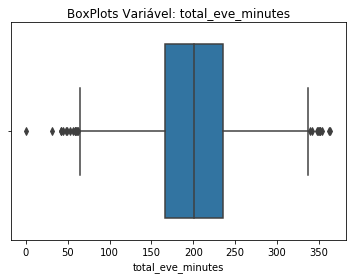

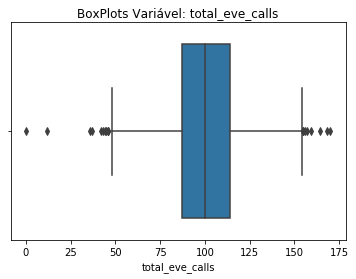

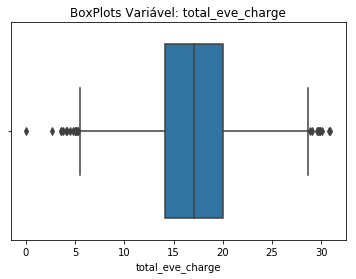

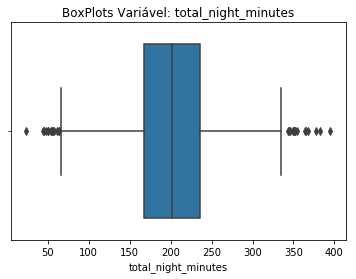

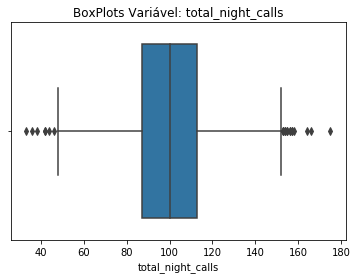

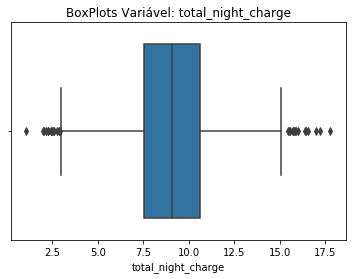

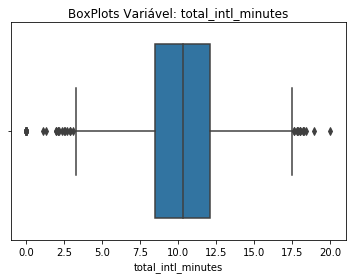

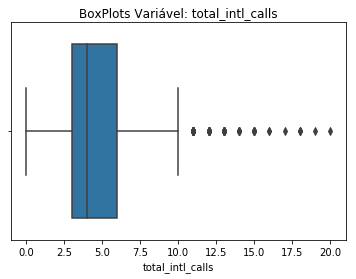

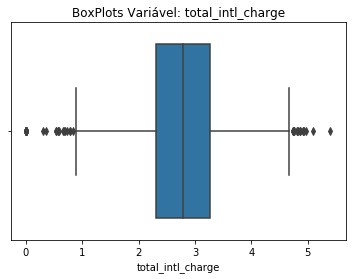

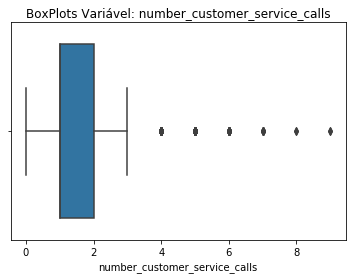

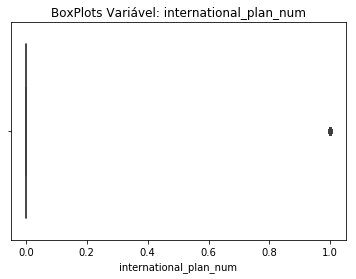

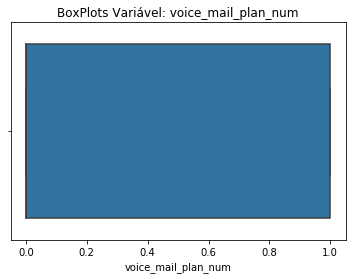

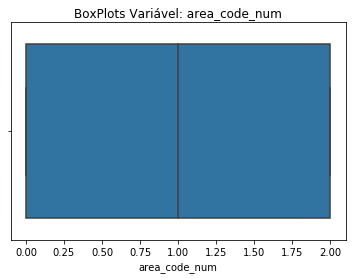

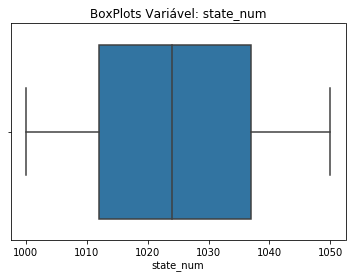

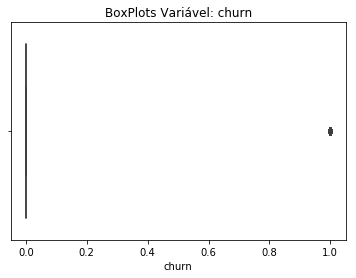

In [17]:
# Removendo os dados categóricos
columns = ds_train.select_dtypes(exclude='category').columns

for i in columns:
    #ds_train[i].plot(kind = 'box')
    sns.boxplot(ds_train[i])
    plt.title('BoxPlots Variável: ' + i)  
    plt.show()

### Verificando a correlação entre as variáveis 

In [18]:
ds_train.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
account_length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.024735,0.002918,-0.006303,0.000816,0.016541
number_vmail_messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,0.008745,0.956927,-0.013083,-0.003014,-0.089728
total_day_minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.049396,-0.001684,-0.025474,-0.009719,0.205151
total_day_calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.003755,-0.011086,-0.009313,-0.026499,0.018459
total_day_charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.049398,-0.001686,-0.025478,-0.009718,0.205151
total_eve_minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.019100,0.021545,0.005931,0.010167,0.092796
total_eve_calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.006114,-0.006444,-0.018454,0.015524,0.009233
total_eve_charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.019106,0.021559,0.005954,0.010173,0.092786
total_night_minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,-0.028905,0.006079,-0.017652,-0.001571,0.035493
total_night_calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802,0.012451,0.015553,-0.001223,0.002445,0.006141


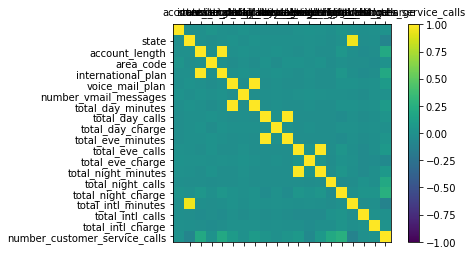

In [19]:
correlations = ds_train.corr()

fig = plt.figure() # Cria uma figura em branco
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1) #Mostrar as correlações
fig.colorbar(cax)
# Definir o tamanho do array. Tamanho escolhido com base no # de variaveis
ticks = np.arange(1, 20, 1) 
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ds_train.columns)
ax.set_yticklabels(ds_train.columns)
plt.show()

In [20]:
ds_train.corr()['churn']

account_length                   0.016541
number_vmail_messages           -0.089728
total_day_minutes                0.205151
total_day_calls                  0.018459
total_day_charge                 0.205151
total_eve_minutes                0.092796
total_eve_calls                  0.009233
total_eve_charge                 0.092786
total_night_minutes              0.035493
total_night_calls                0.006141
total_night_charge               0.035496
total_intl_minutes               0.068239
total_intl_calls                -0.052844
total_intl_charge                0.068259
number_customer_service_calls    0.208750
international_plan_num           0.259852
voice_mail_plan_num             -0.102148
area_code_num                    0.007297
state_num                        0.021924
churn                            1.000000
Name: churn, dtype: float64

É possível verificar que as variáveis: {total_eve_calls}, {total_night_calls} e {area_code_num} são as variáveis que menos possuem correlação com a variável TARGET (churn), podendo ser candidatas a serem removidas durante o treinamento do modelo.

### A - Pré-Processamento: 4. Feature Selection
Será utilizado a técnica RFE (Recursive Feature Elimination) que é baseado na idéia de construir repetidamente um modelo e escolher a que obtiver melhor ou pior desempenho até que os recursos sejam esgotados.

O objetivo do RFE é selecionar recursos considerando recursivamente os conjuntos de recursos cada vez menor.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

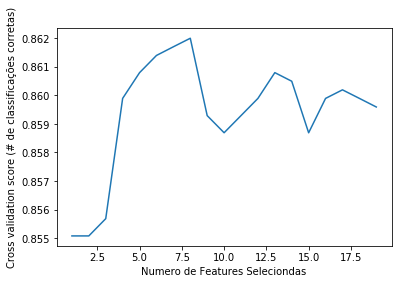

Variáveis Preditoras: Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'international_plan_num',
       'voice_mail_plan_num', 'area_code_num', 'state_num'],
      dtype='object')
Variáveis Selecionadas: [False False  True False False False False False False False False  True
  True  True  True  True  True False  True]
Ranking dos Atributos: [ 7  6  1  4  5  2 10 12  3 11  8  1  1  1  1  1  1  9  1]
Número de Melhores Atributos: 8


In [21]:
# Remove as colunas Categóricas.
ds_train_FeatureSelect = ds_train.drop(['voice_mail_plan','area_code','state','international_plan'], axis=1)

# Transforma o Dataframe do Pandas em um Array Numpy (Array é um formato esperado para utilização do RFE)
ds_train_array = ds_train_FeatureSelect.values

# Separando os dados em inputs(features) e outputs (target)
features_x = ds_train_array[:,:-1] # selecionando todas as colunas exceto a ultima (que é a TARGET)
target_y = ds_train_array[:,19:] # selecionando somente a ultima coluna Target

# Criando o modelo utilizando Regressão Logistica
LogReg = LogisticRegression()

# Aplicando o modelo RFE
rfe = RFECV(LogReg, cv=4, scoring='accuracy')
fit = rfe.fit(features_x, target_y)

plt.figure()
plt.xlabel("Numero de Features Seleciondas")
plt.ylabel("Cross validation score (# de classificações corretas)")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

# Print dos resultados
print("Variáveis Preditoras:", ds_train_FeatureSelect.columns[:-1])
print("Variáveis Selecionadas: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)
print("Número de Melhores Atributos: %d" % fit.n_features_)

del ds_train_FeatureSelect
del features_x
del target_y
del ds_train_array

É possível visualizar que o melhor resultado obtido através do Cross Validation considerando a Acurácia é quando utilizamos 5 variáveis, porém por escolha pessoal, podemos realizar o treinamento utilizando quantas e quais variáveis for desejado.

Variáveis consideradas: {total_intl_calls, 
                         total_intl_charge, 
                         number_customer_service_calls, 
                         international_plan_num, 
                         voice_mail_plan_num
                        }

In [22]:
# Selecionando somente as colunas escolhidas pelo algoritmo RFECV como mais relevantes e melhor acurácia para treinamento.
def SelectVariablesRFECV(dataset):
    datasetReturn = dataset[['total_intl_calls', 'total_intl_charge','number_customer_service_calls', 'international_plan_num',
                                                       'voice_mail_plan_num', 'churn']]
    
    return datasetReturn

In [23]:
ds_train_Selected = SelectVariablesRFECV(ds_train)

### Resumo das variáveis escolhidas pelo RFECV como mais relevantes para utilização

In [24]:
ds_train_Selected.describe()

,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,4.479448,2.764581,1.562856,0.096910,0.276628,0.144914
std,2.461214,0.753773,1.315491,0.295879,0.447398,0.352067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,2.780000,1.000000,0.000000,0.000000,0.000000
75%,6.000000,3.270000,2.000000,0.000000,1.000000,0.000000
max,20.000000,5.400000,9.000000,1.000000,1.000000,1.000000


### Histogramas

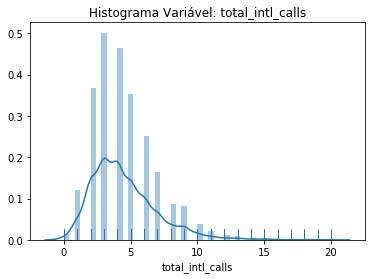

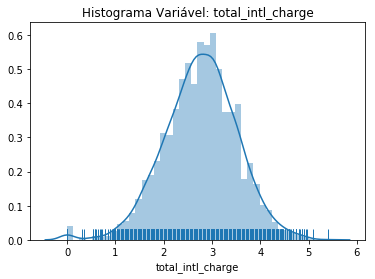

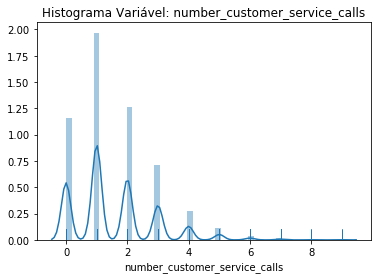

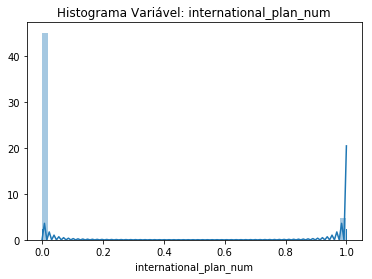

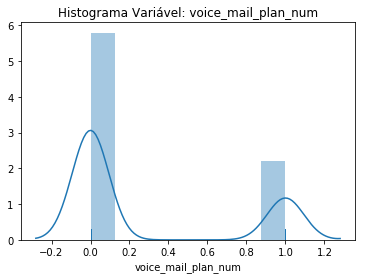

In [25]:
columns = [col for col in ds_train_Selected.columns if col not in ['churn']]
for i in columns:
    #ds_train_Selected[i].plot(kind = 'hist')
    sns.distplot(ds_train_Selected[i], rug=True)
    plt.title('Histograma Variável: ' + i)
    plt.xlabel(i)    
    plt.show()

### BoxPlots

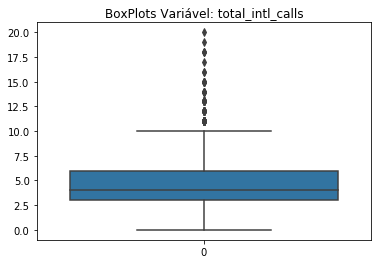

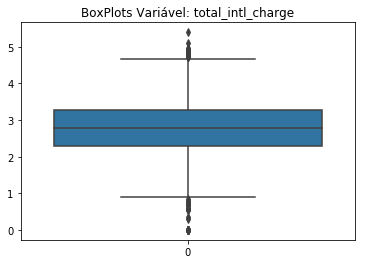

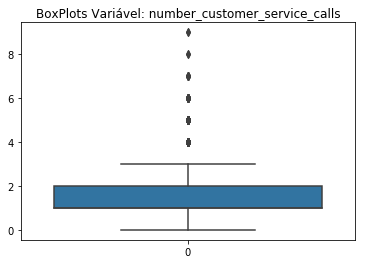

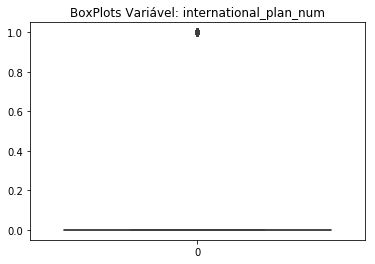

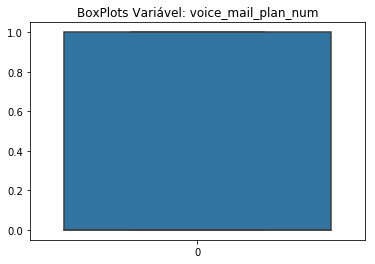

In [26]:
columns = [col for col in ds_train_Selected.columns if col not in ['churn']]

for i in columns:
    #ds_train_Selected[i].plot(kind = 'box')
    sns.boxplot(data=ds_train_Selected[i])
    plt.title('BoxPlots Variável: ' + i)  
    plt.show()

É possível verificar que as variáveis escolhidas durante o Feature Selection possuem muitos outliers (os quais não serão removidos da análise) e portanto, aplicar a técnica de Normalização dos dados pode não ser a melhor. A partir dessa observação, a decisão escolhida será aplicar a técnica de Padronização que irá ajustar os dados para média = 0 e desvio padrão = 1.

### A - Pré-Processamento: 5. Padronização das variáveis
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Assim como o algoritmo RFECV utilizado na etapa de feature Selection, o algoritmo StandardScaler esperar que os dados sejam em formato de Array.

In [27]:
def standardizationData(dataset):
    # Transforma o Dataframe do Pandas em um Array Numpy (Array é um formato esperado para utilização do StandardScale)
    ds_train_array = dataset.values

    # Separando os dados em inputs(features) e outputs (target)
    features_x = ds_train_array[:,:-1] # selecionando todas as colunas exceto a ultima (que é a TARGET)
    target_y = ds_train_array[:,5:] # selecionando somente a ultima coluna Target

    # Gerando os novos dados Padronizados
    StScaler = StandardScaler(with_mean=False, with_std=False).fit(features_x)
    ds_train_return = StScaler.transform(features_x) # Transformamos somente as variáveis preditoras.

    # Nomeia as colunas
    df_features = pd.DataFrame(ds_train_return, columns= ['total_intl_calls', 'total_intl_charge','number_customer_service_calls', 'international_plan_num',
                                                           'voice_mail_plan_num'])
    df_target = pd.DataFrame(target_y, columns=['churn'])

    # Junta os 2 dataframes por coluna
    ds_train_return = pd.concat([df_features,df_target],axis=1) 

    del (ds_train_array)
    del (features_x)
    del (target_y)
    del (StScaler)
    del (df_features)
    del (df_target)

    return ds_train_return

In [28]:
ds_train_standard = standardizationData(ds_train_Selected)
ds_train_standard.head(5)

,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,churn
0,3.0,2.70,1.0,0.0,1.0,0.0
1,3.0,3.70,1.0,0.0,1.0,0.0
2,5.0,3.29,0.0,0.0,0.0,0.0
3,7.0,1.78,2.0,1.0,0.0,0.0
4,3.0,2.73,3.0,1.0,0.0,0.0


In [29]:
ds_train_standard.describe()

,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,4.479448,2.764581,1.562856,0.096910,0.276628,0.144914
std,2.461214,0.753773,1.315491,0.295879,0.447398,0.352067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,2.780000,1.000000,0.000000,0.000000,0.000000
75%,6.000000,3.270000,2.000000,0.000000,1.000000,0.000000
max,20.000000,5.400000,9.000000,1.000000,1.000000,1.000000


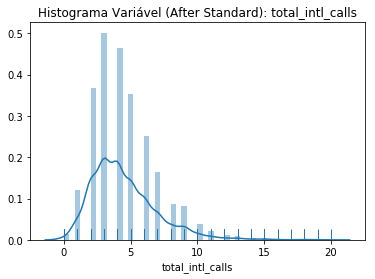

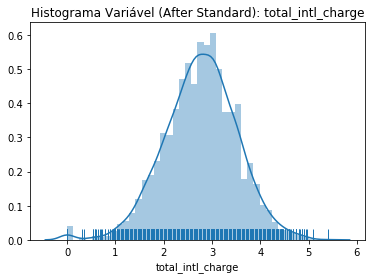

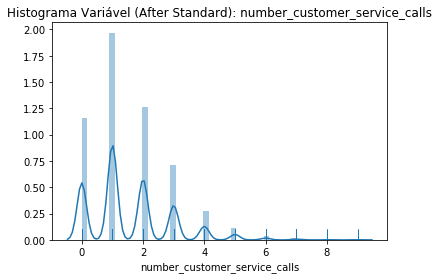

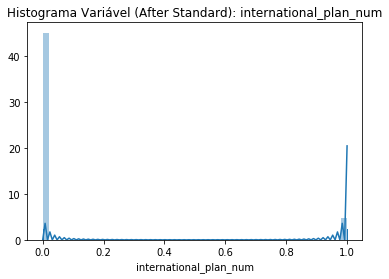

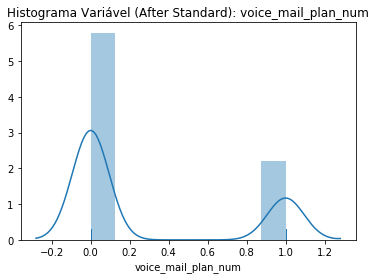

In [30]:
columns = [col for col in ds_train_Selected.columns if col not in ['churn']]
for i in columns:
    #ds_train_Selected[i].plot(kind = 'hist')
    sns.distplot(ds_train_Selected[i], rug=True)
    plt.title('Histograma Variável (After Standard): ' + i)
    plt.xlabel(i)    
    plt.show()

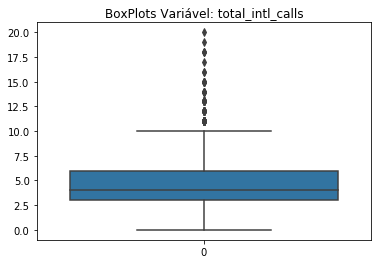

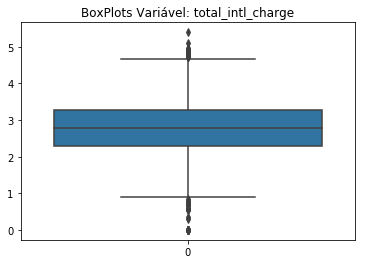

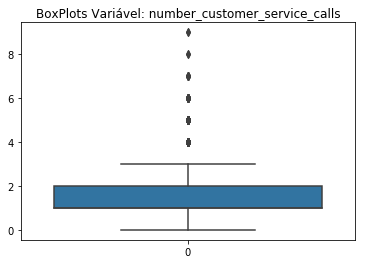

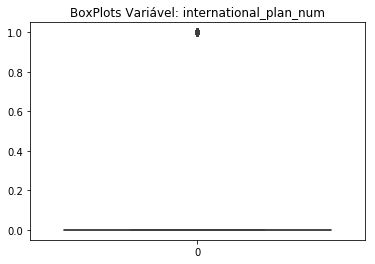

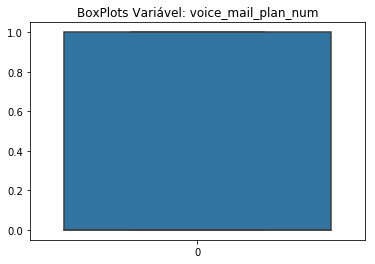

In [31]:
columns = [col for col in ds_train_standard.columns if col not in ['churn']]

for i in columns:
    #ds_train_standard[i].plot(kind = 'box')
    sns.boxplot(data=ds_train_standard[i])
    plt.title('BoxPlots Variável: ' + i)  
    plt.show()

### A - Pré-Processamento: 6. Balanceamento dos Dados
Como Verificado durante a etapa 3, os dados estão desbalanceados e para que o modelo não fique tendêncioso, será utilizado a técnica SMOTTE para incluir novos dados e balancear a quantidade de cada classe.

In [32]:
def BalancingData(dataset, var_target):
    
    # Split da variavel target e variaveis preditoras
    x_train = dataset.drop([var_target], axis=1)
    y_train = dataset[var_target]
    
    smt = SMOTE()
    
    # Separando os dados em features e target
    features_train, target_train = smt.fit_sample(x_train, y_train)
    
    target_train_DF = pd.DataFrame(target_train)
    # atribuindo o nome da coluna
    target_train_DF.columns = ['churn']
    
    features_train_DF = pd.DataFrame(features_train)
    features_train_DF.columns = x_train.columns
    
    return pd.concat([features_train_DF, target_train_DF], axis=1)

In [33]:
ds_train_final = BalancingData(ds_train_standard, 'churn')

Count_No = len(ds_train_final[ds_train_final['churn']==0])
Count_Yes = len(ds_train_final[ds_train_final['churn']==1])

print ("Percentual de Clientes que Cancelou Depois do Balanceamento: ", round((Count_Yes / (Count_Yes+Count_No))*100,2))
print ("Percentual de Clientes que Não Cancelou Depois do Balanceamento: ", round((Count_No / (Count_Yes+Count_No))*100,2))

Percentual de Clientes que Cancelou Depois do Balanceamento:  50.0
Percentual de Clientes que Não Cancelou Depois do Balanceamento:  50.0


### B - Aprendizado e Avaliação: 1. Split do dataset Treino em Treino/Teste

In [34]:
ds_train_array = ds_train_final.values

# Separando os dados em inputs(features) e outputs (target)
features_x = ds_train_array[:,:-1] # selecionando todas as colunas exceto a ultima (que é a TARGET)
target_y = ds_train_array[:,5:] # selecionando somente a ultima coluna Target

# Definindo o tamanho da amonstra
data_size_test = 0.30 # 30%

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(features_x, target_y, test_size = data_size_test)

del (features_x)
del (target_y)
del (data_size_test)
del (ds_train_array)

### B - Aprendizado e Avaliação: 2. Escolha do Modelo a ser utilizado
Como determinado nas especificações do projeto, o modelo a ser utilizado será o de Regressão Logistíca

In [35]:
# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo com os dados de treino
modelo.fit(X_treino, Y_treino)

# Acurácia do modelo nos dados de teste
# Utilizado 
modelo.score(X_teste, Y_teste)

0.6707602339181287

### B - Aprendizado e Avaliação: 3. Cross-Validation
Aplicando Cross-Validation para encontrar a média das previsões do modelo com dados de teste.

In [36]:
def CrossValidation(model, x_test, y_test, metric_scoring, kfold):
    
    cv_result = cross_val_score(model, X= x_test, y= y_test, cv=kfold, scoring= metric_scoring)

    return print("Cross-Validation mean:",cv_result.mean())

In [37]:
kfold = KFold(n_splits= 10, shuffle=True)

CrossValidation(modelo, X_teste, Y_teste, 'accuracy', kfold)

Cross-Validation mean: 0.6801169590643275


### B - Aprendizado e Avaliação: 4. Confusion Matrix
Usado para descrever a performance da classificação de um modelo em um conjunto de dados de teste cujo os valores reais são conhecidos.

In [38]:
# Prevendo o resultado do modelo informando as variáveis preditoras de teste, para depois realizar a classificação e taxa
# de acerto obtido pelo modelo.
target_predicted = modelo.predict(X_teste)
target_proba     = modelo.predict_proba(X_teste)

print("Accuracy (TP/Total):",metrics.accuracy_score(Y_teste, target_predicted))
print("Precision (TP/TP+FP):",metrics.precision_score(Y_teste, target_predicted))
print("Recall (TP/TP+FN):",metrics.recall_score(Y_teste, target_predicted))
print("Classification Report:")
print(metrics.classification_report(Y_teste, target_predicted))
print(target_proba)

Accuracy (TP/Total): 0.6707602339181287
Precision (TP/TP+FP): 0.7127222982216143
Recall (TP/TP+FN): 0.5961098398169337
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.75      0.69       836
         1.0       0.71      0.60      0.65       874

    accuracy                           0.67      1710
   macro avg       0.68      0.67      0.67      1710
weighted avg       0.68      0.67      0.67      1710

[[0.36784018 0.63215982]
 [0.49448904 0.50551096]
 [0.37575117 0.62424883]
 ...
 [0.44062228 0.55937772]
 [0.64449573 0.35550427]
 [0.38961396 0.61038604]]


Text(0.5, 257.44, 'Predicted label')

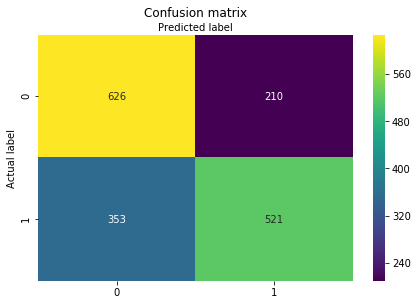

In [39]:
cnf_matrix = metrics.confusion_matrix(Y_teste, target_predicted)

class_names = [1,0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### B - Aprendizado e Avaliação: 5. Otimização do modelo (Ajuste de Hiper-parametros)

In [40]:
valores_grid = {'C': [0.001,0.01,0.1,1,10,100,1000,1000000]}

rsearch = GridSearchCV(estimator = modelo, param_grid = valores_grid)

rsearch.fit(X_treino, Y_treino)

rsearch.best_score_


0.6731829573934837

O resultado obtido após a otimização utilizando GridSearchCV não foi relevante para o modelo.

### C - Previsão: 1. Tratamento dos Dados
Remover a variável Target, Selecionar as variáveis obtidas durante a Feature Selection e Realizar a padronização de dados.

In [41]:
# Carregando o dataset de treino utilizando Pandas
ds_test = pd.read_csv("data/projeto4_telecom_teste.csv", sep = ",")
ds_test.head(5)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [42]:
# Remove a coluna 
ds_test = ds_test.drop('Unnamed: 0', axis=1)

In [43]:
# Verificando se existe valores missing
ds_test.isnull().values.any()

False

In [44]:
ds_test = transformColumns(ds_test)
ds_test.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,area_code_num,state_num,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,...,10.62,10.6,3,2.86,3,0,0,2,1024,0
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,...,4.24,9.5,7,2.57,0,0,0,2,1012,0
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,...,13.51,13.7,6,3.70,1,0,1,1,1001,0
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,...,9.93,15.7,2,4.24,1,0,0,0,1041,0
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,...,9.20,7.7,4,2.08,2,0,0,0,1021,0


In [45]:
# Aplica a seleção de Variáveis 
ds_test_Selected = SelectVariablesRFECV(ds_test)

In [46]:
# Aplica a padronização dos dados e remover a coluna Churn
ds_test_standard = standardizationData(ds_test_Selected)

ds_test_standard = ds_test_standard.drop('churn', axis=1)

ds_test_standard.head(5)

,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num
0,3.0,2.86,3.0,0.0,0.0
1,7.0,2.57,0.0,0.0,0.0
2,6.0,3.70,1.0,0.0,1.0
3,2.0,4.24,1.0,0.0,0.0
4,4.0,2.08,2.0,0.0,0.0


In [47]:
# Transforma as variáveis target em array
features_x = ds_test_standard.values

### C - Previsão: 2. Previsão de novos dados

In [48]:
predicted_value = modelo.predict(features_x)
predicted_proba = modelo.predict_proba(features_x)

predict_value_df = pd.DataFrame(predicted_value, columns=['Ação Prevista'])
predict_proba_df = pd.DataFrame(predicted_proba, columns=['Prob. Não Cancelamento','Prob. Cancelamento'])

In [49]:
result_final = pd.concat([ds_test_standard, predict_value_df, predict_proba_df],axis=1)
result_final.head(10)

,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,Ação Prevista,Prob. Não Cancelamento,Prob. Cancelamento
0,3.0,2.86,3.0,0.0,0.0,1.0,0.375262,0.624738
1,7.0,2.57,0.0,0.0,0.0,0.0,0.743714,0.256286
2,6.0,3.70,1.0,0.0,1.0,0.0,0.816746,0.183254
3,2.0,4.24,1.0,0.0,0.0,0.0,0.504343,0.495657
4,4.0,2.08,2.0,0.0,0.0,0.0,0.536560,0.463440
5,5.0,1.86,1.0,0.0,0.0,0.0,0.664094,0.335906
6,3.0,3.48,1.0,0.0,1.0,0.0,0.801002,0.198998
7,6.0,3.00,0.0,0.0,0.0,0.0,0.715559,0.284441
8,4.0,2.67,2.0,0.0,0.0,0.0,0.504724,0.495276
9,1.0,3.21,0.0,0.0,1.0,0.0,0.856806,0.143194


In [50]:
result_final.groupby('Ação Prevista').size()

Ação Prevista
0.0    1128
1.0     539
dtype: int64

Dos dados utilizados para realizar previsões, é possível notar que das 1667 Operadoras-Telecom, 539 irão cancelar.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### Improvement - to DO:

Realizar o tratamento dos outliers das variáveis como forma de otimizar a acurácia do modelo final.